# **Hands On Machine Learning**

<img src='https://m.media-amazon.com/images/I/71UF9mDAX3L._AC_UF1000,1000_QL80_.jpg' width=20%><br>
<p>Linear Regression Training Details</p>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

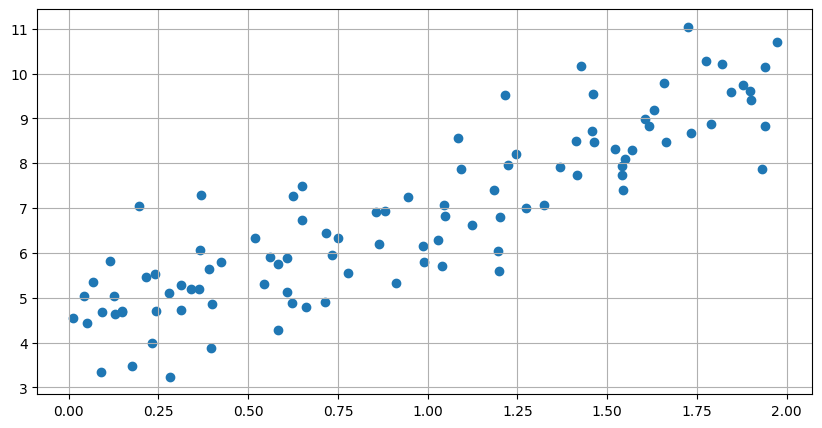

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()

In [8]:
from sklearn.preprocessing import add_dummy_feature

Xb = add_dummy_feature(X)
params = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y

In [9]:
X_new = np.array([[0], [2]])
X_newb = add_dummy_feature(X_new)
y_pred = X_newb @ params
y_pred

array([[4.21509616],
       [9.75532293]])

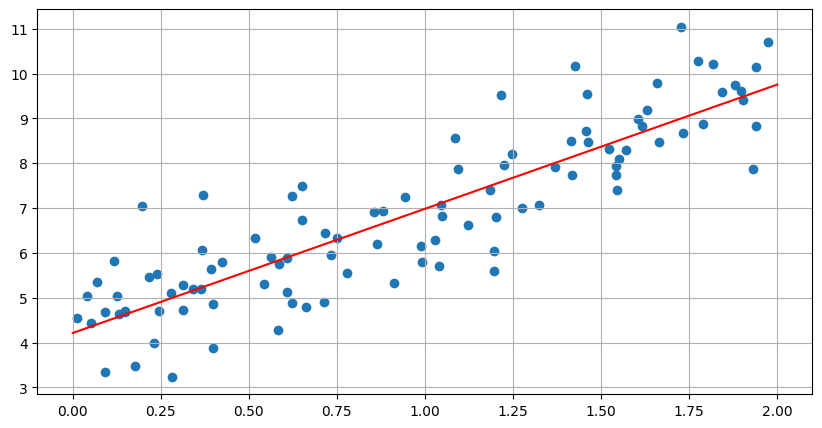

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()
plt.plot(X_new, y_pred, c='red');

# **Gradient Descent types:**
- Batch GD
- Stochastic GD
- Mini-Batch GD

1. **Batch GD**

In [11]:
eta = 0.1
n_epochs = 1000
m = len(Xb)

In [12]:
np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  gradients = 2 / m * Xb.T @ (Xb @ theta - y)
  theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
X_line = np.linspace(0, 2)
y_line = X_line * theta[0] + theta[1]

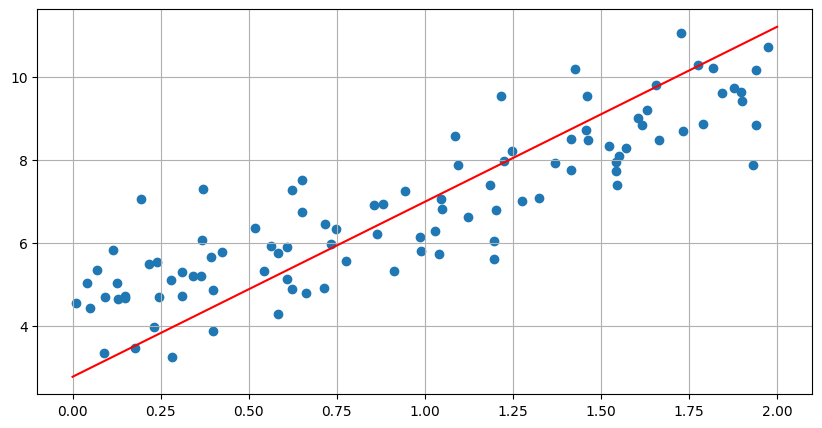

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()
plt.plot(X_line, y_line, c='red');

2. **SGD**

We'll use learning schedule with this one in order to slow down changes to the end

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning scheducle hyperparameters changing lr

In [19]:
def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [20]:
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = Xb[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [21]:
X_line = np.linspace(0, 2)
y_line = X_line * theta[0] + theta[1]

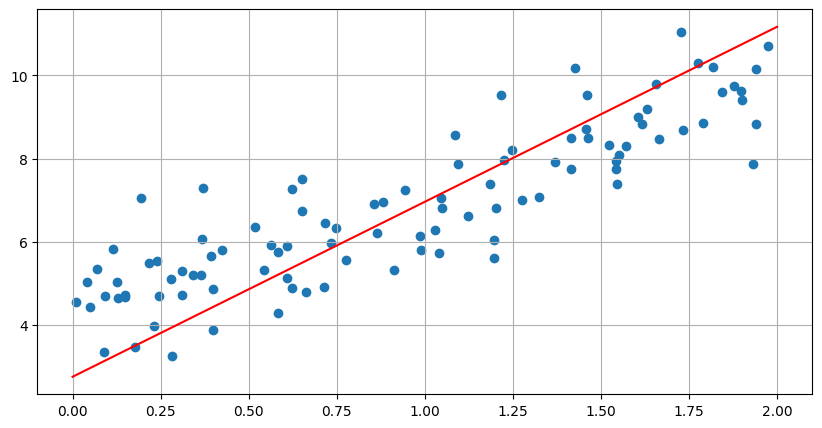

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()
plt.plot(X_line, y_line, c='red');

# **POLYNOMIAL REGRESSION**

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

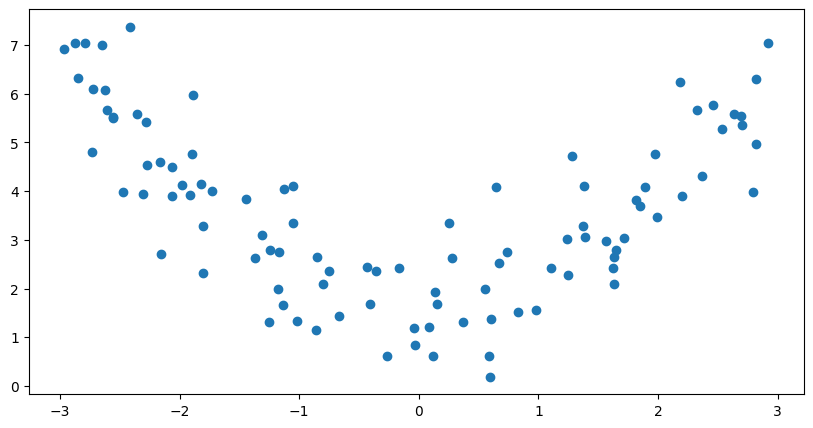

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y);

Such data can not be linearly described!

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_feats = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feats.fit_transform(X)
X[0]

array([-0.75275929])

In [32]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly contains original X feature and polynomial one

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [36]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[-0.06633107,  0.56456263]]))

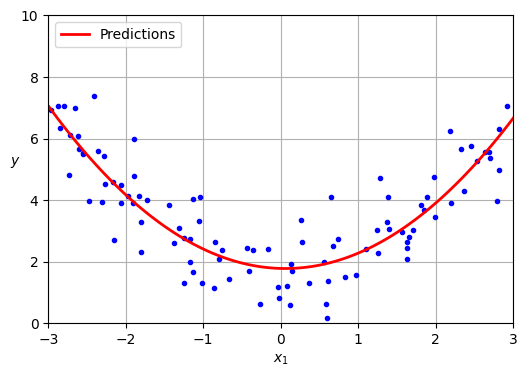

In [37]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feats.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

It works because our linear model is described with:<br>
$$\hat y = ΘX$$
or in other words:
$$\hat y = b + ∑{w_i x_i}$$
When we add 2nd feature x_2 such that:
$$x_2 = x_1^2$$ we get an equation:
$$w_2x_1^2 + w_1x_1 + b$$
which is a quadratic function:
$$ax^2 + bx + c$$

How to understand if our model overfits the data or underfits?<br>
Build a Learning Curve for it!

In [38]:
from sklearn.model_selection import learning_curve

In [40]:
train_size, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

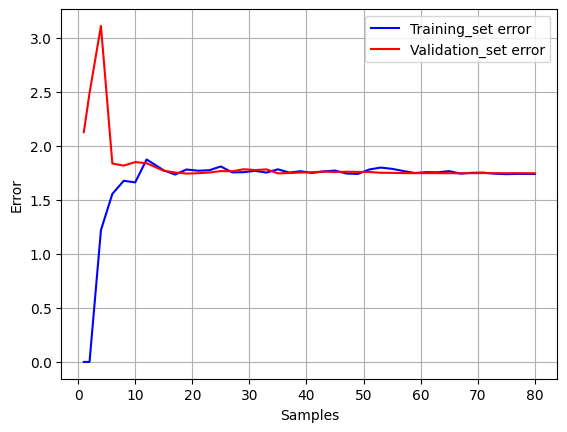

In [42]:
plt.plot(train_size, train_errs, color='blue', label='Training_set error')
plt.plot(train_size, val_errs, color='red', label='Validation_set error')
plt.grid()
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Error')
plt.show();

### **Now let's look at the 10th degree polynomial**

In [54]:
from sklearn.pipeline import make_pipeline

In [55]:
polynomial_regr = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

In [61]:
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regr, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

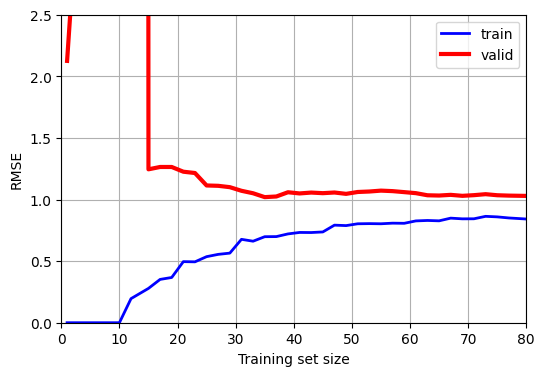

In [62]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "b", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "r", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Here this 10 degree polynomial looks to be overfitting our data as training error is lower than valid one.<br>
However size increasing could help here

In [63]:
polynomial_regr = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

In [64]:
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regr, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

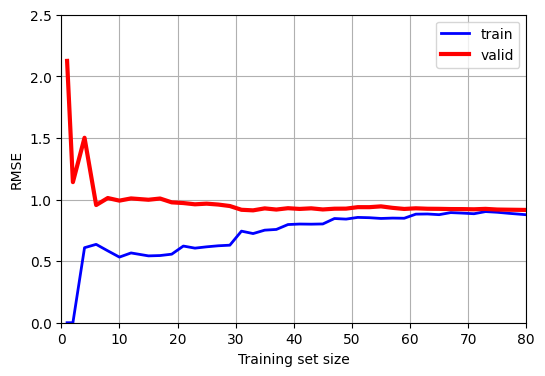

In [65]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "b", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "r", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Good!<br>
Here's no huge gap in here and it's just right!